<a href="https://colab.research.google.com/github/suryawahyus/MachineLearning/blob/main/TaskWeek8/SVR_Salary_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Path ke file CSV di Google Drive
file_path = '/content/drive/MyDrive/Machine Learning/dataset/Salary_Data.csv'

# Membaca file CSV ke DataFrame menggunakan pandas
df = pd.read_csv(file_path)

# Menampilkan DataFrame
df


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [9]:
# Menampilkan beberapa baris pertama dari dataset sebelum penghapusan NaN
print("Sebelum penghapusan NaN:")
print(df.head())

# Menghilangkan semua nilai NaN
df_cleaned = df.dropna()

# Menampilkan beberapa baris pertama dari dataset setelah penghapusan NaN
print("\nSetelah penghapusan NaN:")
print(df_cleaned.head())


Sebelum penghapusan NaN:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  

Setelah penghapusan NaN:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's        

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Memisahkan fitur dan target
X = df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = df['Salary']

# Menghilangkan baris yang mengandung nilai NaN
df_cleaned = pd.concat([X, y], axis=1).dropna()

# Memisahkan fitur dan target setelah menghilangkan nilai NaN
X_cleaned = df_cleaned[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y_cleaned = df_cleaned['Salary']

# Mengkonversi kolom kategorikal menjadi variabel dummy
X_cleaned = pd.get_dummies(X_cleaned, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat model SVR
model = SVR(kernel='linear')  # Anda dapat memilih kernel yang sesuai dengan karakteristik data Anda

# Melatih model
model.fit(X_train_scaled, y_train)

# Membuat prediksi
y_pred = model.predict(X_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 42873.69389866098


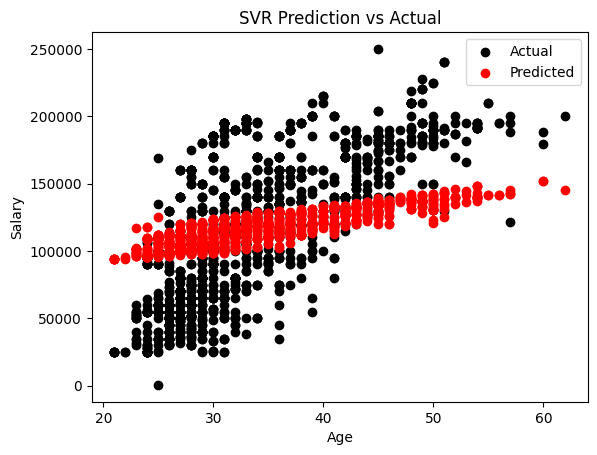

In [12]:
import matplotlib.pyplot as plt
# Membuat grafik
plt.scatter(X_test['Age'], y_test, color='black', label='Actual')
plt.scatter(X_test['Age'], y_pred, color='red', label='Predicted')
plt.title('SVR Prediction vs Actual')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()